# Set Up and libraries

In [1]:
# Reviews CSV
%%capture
#!wget https://www.dropbox.com/scl/fi/6u1yfcnnf4jqmhedx519u/Reviews.csv?rlkey=xqmvvohkq0i0k7hho79fs43b6&st=mexudbu2&dl=0
#!mv Reviews.csv?rlkey=xqmvvohkq0i0k7hho79fs43b6 reviews.csv
# Reviews images related
!wget https://www.dropbox.com/scl/fi/2o3fmzj4jdsfujfhu0mns/reviews.zip?rlkey=yc8doasvaavp2993huknxw6jt&st=3e3bpy5q&dl=0
!mv reviews.zip?rlkey=yc8doasvaavp2993huknxw6jt reviews.zip
!unzip reviews.zip

!wget https://www.dropbox.com/scl/fi/g8862obe2z29su61popjx/restaurants.csv?rlkey=rhrn6vg0zg6ier2yuz9lh00yh&st=fqh0067i&dl=0
!mv restaurants.csv?rlkey=rhrn6vg0zg6ier2yuz9lh00yh restaurants.csv

!wget https://www.dropbox.com/scl/fi/6u1yfcnnf4jqmhedx519u/reviews.csv?rlkey=xqmvvohkq0i0k7hho79fs43b6&st=ko3q9dnq&dl=0
!mv reviews.csv?rlkey=xqmvvohkq0i0k7hho79fs43b6 reviews.csv

In [2]:
!wget https://www.dropbox.com/scl/fi/g8862obe2z29su61popjx/restaurants.csv?rlkey=rhrn6vg0zg6ier2yuz9lh00yh&st=tqfdpqjv&dl=0
!mv restaurants.csv?rlkey=rhrn6vg0zg6ier2yuz9lh00yh restaurants.csv

--2024-12-09 03:36:45--  https://www.dropbox.com/scl/fi/g8862obe2z29su61popjx/restaurants.csv?rlkey=rhrn6vg0zg6ier2yuz9lh00yh
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0ab9675f3ed3d7c8f045612331.dl.dropboxusercontent.com/cd/0/inline/Cf5v505oycOn7ajuosoMeMCJW0X6SQJeHKVkj1y2zvAaYtb3cQOtWmoNHr2C13DCGgcPTsY0Bu3MvYaacUZZQgTc74MPFy0XUmDKsj0q0AgVtZ3nm_e9bxQZJx5GSaw90nEhwBBsjhFbAVAozmNUS2d1/file# [following]
--2024-12-09 03:36:46--  https://uc0ab9675f3ed3d7c8f045612331.dl.dropboxusercontent.com/cd/0/inline/Cf5v505oycOn7ajuosoMeMCJW0X6SQJeHKVkj1y2zvAaYtb3cQOtWmoNHr2C13DCGgcPTsY0Bu3MvYaacUZZQgTc74MPFy0XUmDKsj0q0AgVtZ3nm_e9bxQZJx5GSaw90nEhwBBsjhFbAVAozmNUS2d1/file
Resolving uc0ab9675f3ed3d7c8f045612331.dl.dropboxusercontent.com (uc0ab9675f3ed3d7c8f045612331.dl.dropboxusercontent.com)... 162.125.1.15, 262

In [12]:
%%capture
import pandas as pd
import numpy as np
import json
import gzip
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns



# Data Preprocessing

Cargamos la data de las reviews

In [8]:
df = pd.read_csv('reviews.csv')
print(f"Tamaño dataset: {df.shape}")

count_per_state = df['state'].value_counts()
for state, count in count_per_state.items():
    folder_size = len(os.listdir(f'reviews/{state}'))
    print(f"State: {state}, Count: {count}")
    print(f"Folder size {folder_size}")
    if folder_size >= count:
        print('- Se encuentran todas las imagenes => No hay conflictos\n')
    else:
        print('- Hay que eliminar imagenes => Conflicto\n')
        for row in df.itertuples():
            img_filename = row.img_filename
            path = f'{row.gmap_id}.png'
            state = row.state
            if path not in os.listdir(f'reviews/{state}'):
                print(row)

# Eliminamos datos nulos ...
df = df.dropna()


Tamaño dataset: (8334, 9)
State: Virginia, Count: 2881
Folder size 2948
- Se encuentran todas las imagenes => No hay conflictos

State: California, Count: 1775
Folder size 1775
- Se encuentran todas las imagenes => No hay conflictos

State: Texas, Count: 1134
Folder size 1134
- Se encuentran todas las imagenes => No hay conflictos

State: Hawaii, Count: 984
Folder size 984
- Se encuentran todas las imagenes => No hay conflictos

State: Florida, Count: 912
Folder size 912
- Se encuentran todas las imagenes => No hay conflictos

State: North_Dakota, Count: 648
Folder size 678
- Se encuentran todas las imagenes => No hay conflictos



In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8038 entries, 0 to 8333
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    8038 non-null   int64 
 1   user_id       8038 non-null   object
 2   gmap_id       8038 non-null   object
 3   rating        8038 non-null   int64 
 4   text          8038 non-null   object
 5   img_url       8038 non-null   object
 6   img_filename  8038 non-null   object
 7   state         8038 non-null   object
 8   rest_id       8038 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 628.0+ KB


También cargamos data de restaurantes

In [ ]:
df_restaurants = pd.read_csv('restaurants.csv')

df_restaurants.rename(columns={'Unnamed: 0': 'rest_id'}, inplace=True)

df_restaurants.info()

### Distribución de calificaciones en las reviews

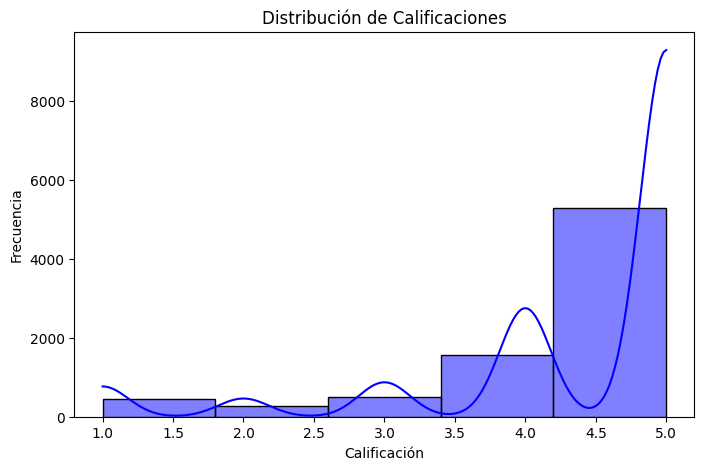

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df['rating'], bins=5, kde=True, color='blue')
plt.title("Distribución de Calificaciones")
plt.xlabel("Calificación")
plt.ylabel("Frecuencia")
plt.show()

### Cantidad de reviews consideradas en cada estado

Cantidad de reviews por estado:
state
Virginia        2681
California      1775
Texas           1134
Hawaii           984
Florida          912
North_Dakota     552
Name: count, dtype: int64


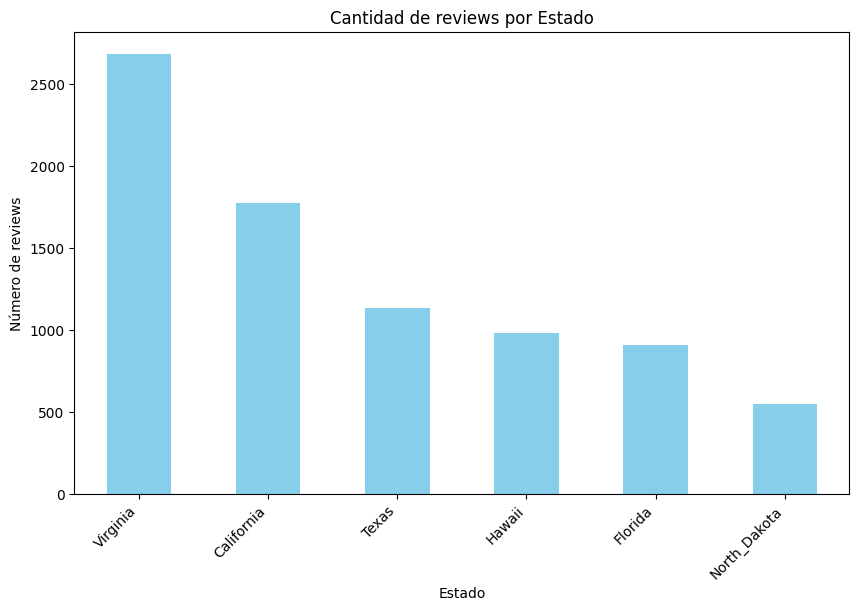

In [82]:
ratings_per_state = df['state'].value_counts()

print("Cantidad de reviews por estado:")
print(ratings_per_state)

plt.figure(figsize=(10, 6))
ratings_per_state.plot(kind='bar', color='skyblue')
plt.title("Cantidad de reviews por Estado")
plt.xlabel("Estado")
plt.ylabel("Número de reviews")
plt.xticks(rotation=45, ha='right')
plt.show()


### Usuarios y cantidad de reviews

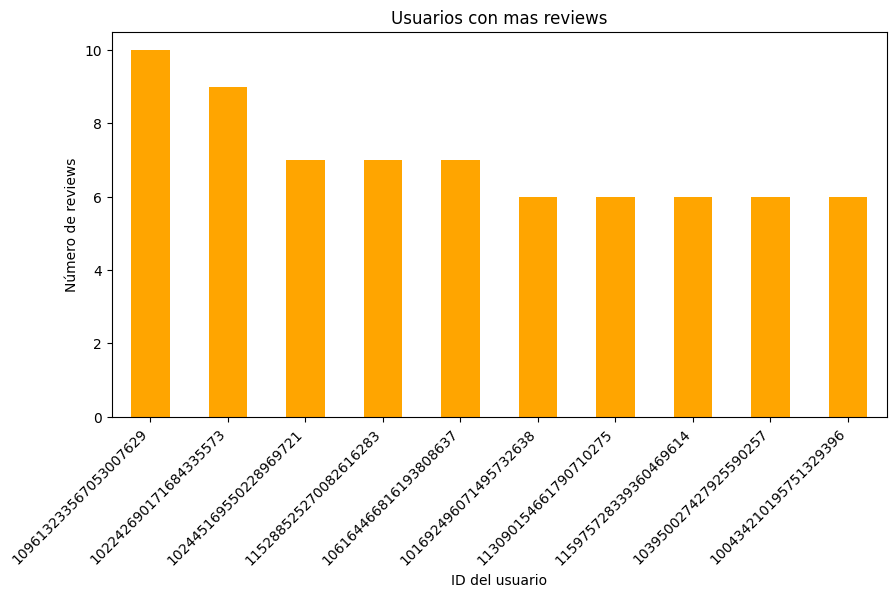

In [60]:

reviews_per_user = df['user_id'].value_counts()

top_users = reviews_per_user.head(10)

plt.figure(figsize=(10, 5))
top_users.plot(kind='bar', color='orange')
plt.title("Usuarios con mas reviews")
plt.xlabel("ID del usuario")
plt.ylabel("Número de reviews")
plt.xticks(rotation=45, ha='right')
plt.show()

El usuario que tiene más reseñas tiene 10 y los que le siguen en el top 10 tienen hasta 6 reseñas.

### Ejemplos de texto

In [74]:
random_reviews = df['text'].sample(5)

print("Ejemplos de reviews en texto:")
for i, review in enumerate(random_reviews, 1):
    print(f"{i}. {review}")

Ejemplos de reviews en texto:
1. Unfriging un-believable pizza! The "8-CORNER PIZZA" never disappoints! The spot!
2. Really good! After being greeted with complimentary valet we made our way through the revolving door entrance of District 30. My wife and I were promptly welcomed by Jose who sat us at a large and comfortably cozy semicircle both. The decor was urban rustic with lots of space for dining. Additionally, there was a bar not lacking for tap options. We had the braised short ribs with Yukon Gold potatoes. It was amazing! It paired well with my glass of Rickshaw Pinot Noir. The service was also excellent. We had a fantastic time and we'll be heading back soon for Tiramisu. Excellent job, District 30!
3. I almost never give a 5 star review; everything was good, we waited a bit longer than I thought was normal to be able to order. Our dine-in reservation was for 6:30 PM; we arrived at about 6:15 & waited outside for the text notifying us that we could go in. At about 6:50 we wen

### Palabras más comunes

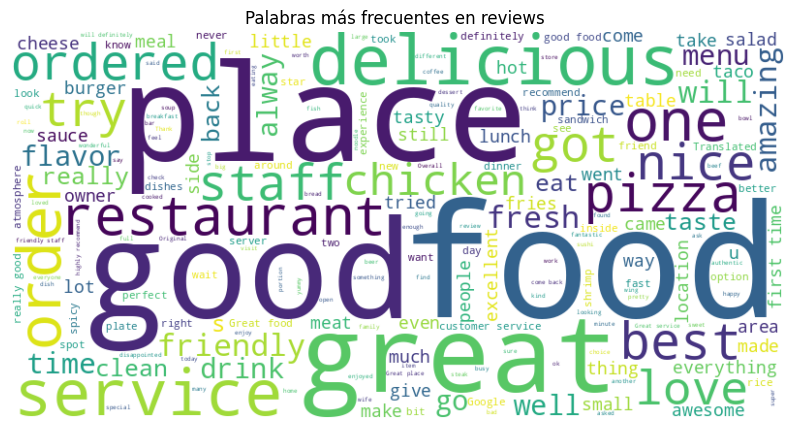

In [61]:
from wordcloud import WordCloud
from collections import Counter


all_reviews = " ".join(df['text'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Palabras más frecuentes en reviews ")
plt.show()

### Opiniones de las reviews

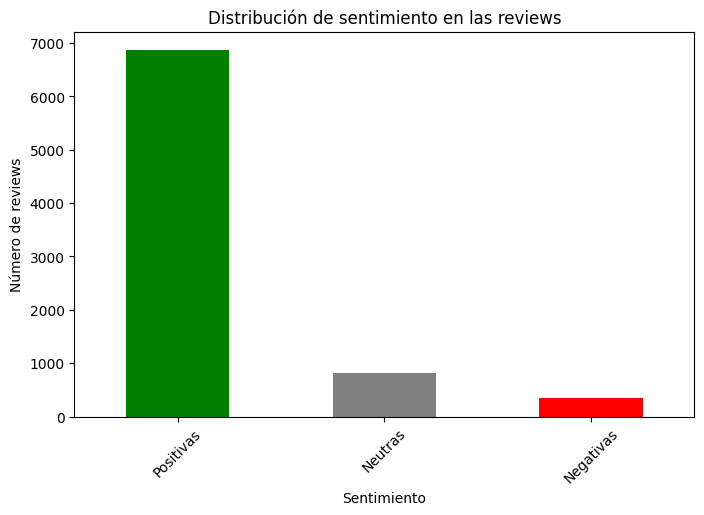

In [80]:
from textblob import TextBlob

df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

df['sentiment_label'] = pd.cut(df['sentiment'], bins=[-1, -0.1, 0.1, 1], labels=['Negativas', 'Neutras', 'Positivas'])

sentiment_counts = df['sentiment_label'].value_counts()

sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'], figsize=(8, 5))
plt.title("Distribución de sentimiento en las reviews")
plt.xlabel("Sentimiento")
plt.xticks(rotation=45)
plt.ylabel("Número de reviews")
plt.show()


### Ejemplos de imágenes en las reviews

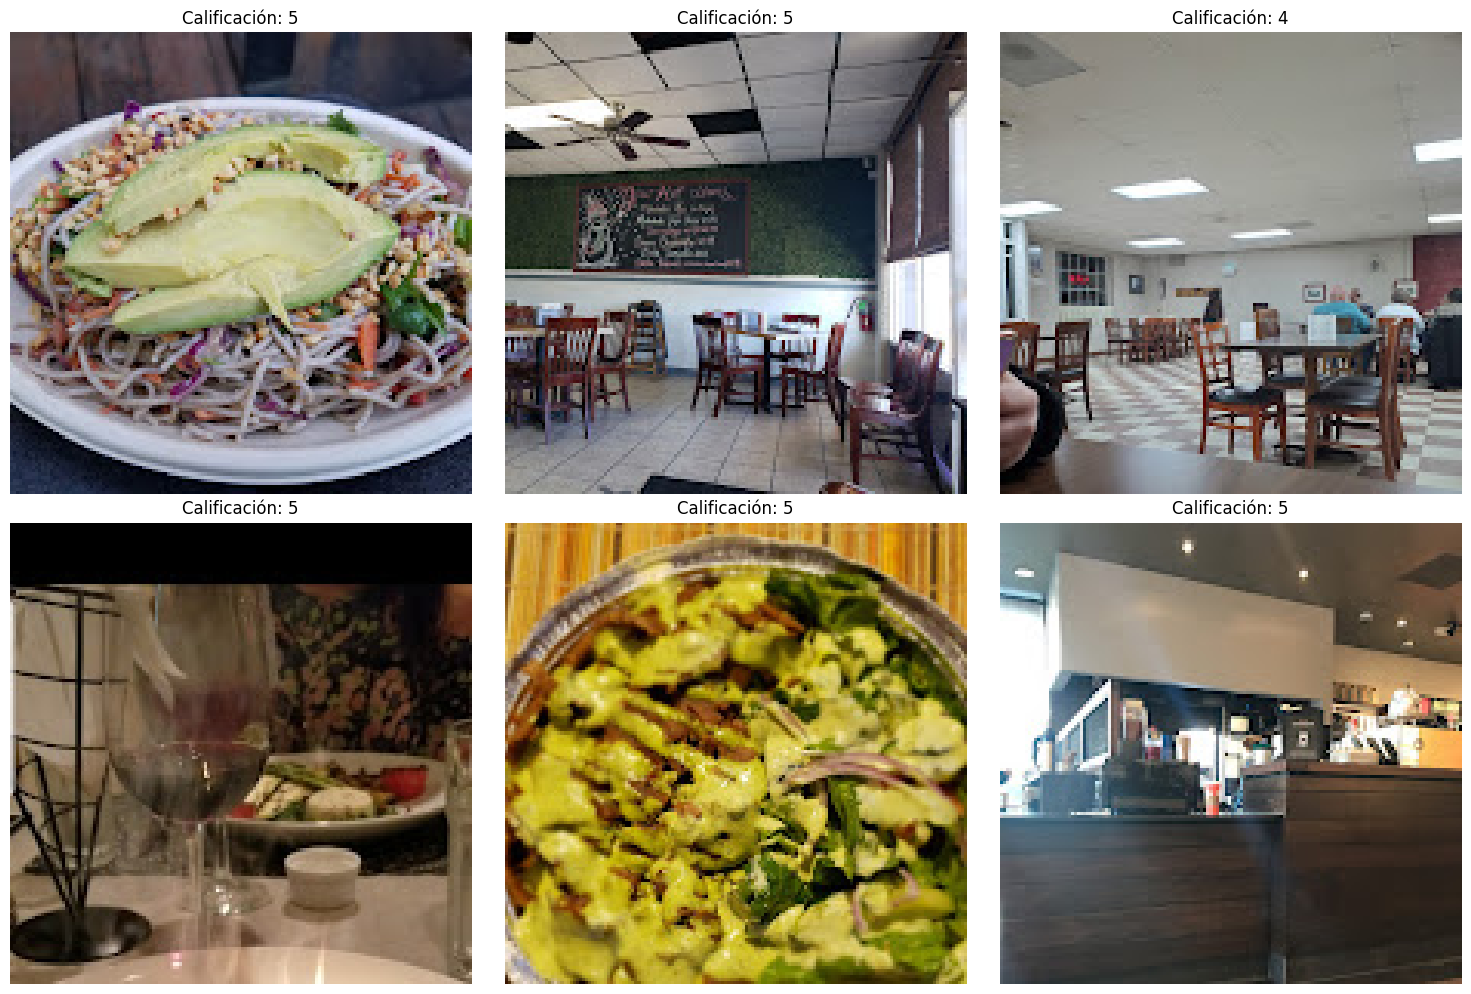

In [22]:
from PIL import Image

sample_reviews = df.sample(6)
plt.figure(figsize=(15, 10))

for i, row in enumerate(sample_reviews.itertuples()):
    img_path = f"reviews/{row.img_filename}"
    img = Image.open(img_path)

    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(f"Calificación: {row.rating}")
    plt.axis("off")

plt.tight_layout()
plt.show()


Notemos que no hay algunas imagenes que no tienen mucho que ver con la comida directamente o no pueden dar mucha información del lugar.

### Restaurantes con más reviews

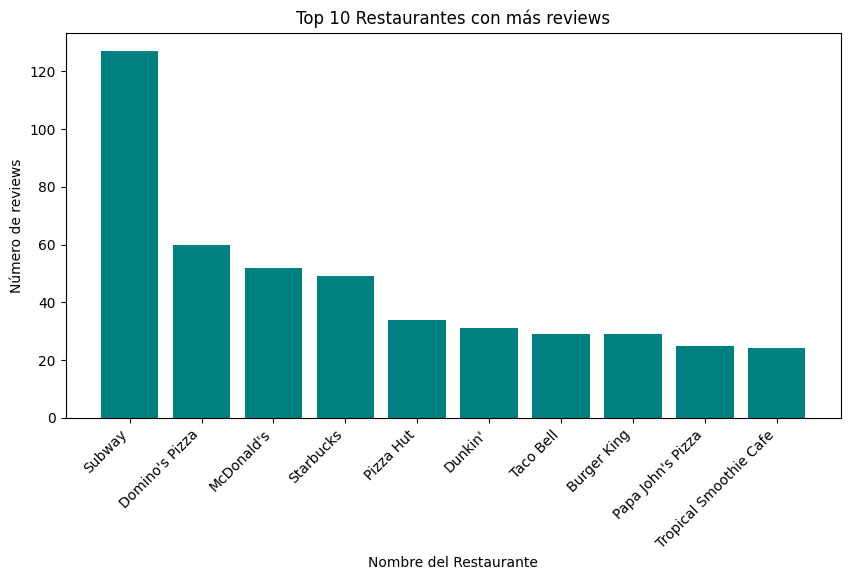

In [62]:
reviews_per_restaurant = df['rest_id'].value_counts()

top_restaurants = reviews_per_restaurant.head(10)
restaurant_names = []
for idx in top_restaurants.index:
    name = df_restaurants[df_restaurants['rest_id'] == idx]['name'].values[0]
    restaurant_names.append(name)

top_restaurants_named = pd.DataFrame({
    'name': restaurant_names,
    'num_reviews': top_restaurants.values
})

plt.figure(figsize=(10, 5))
plt.bar(top_restaurants_named['name'], top_restaurants_named['num_reviews'], color='teal')
plt.title("Top 10 Restaurantes con más reviews")
plt.xlabel("Nombre del Restaurante")
plt.ylabel("Número de reviews")
plt.xticks(rotation=45, ha='right')
plt.show()


Tiene sentido que los que más reseñas tengan sean de las principales cadenas de comida rápida.

### Categorías más populares de restaurant

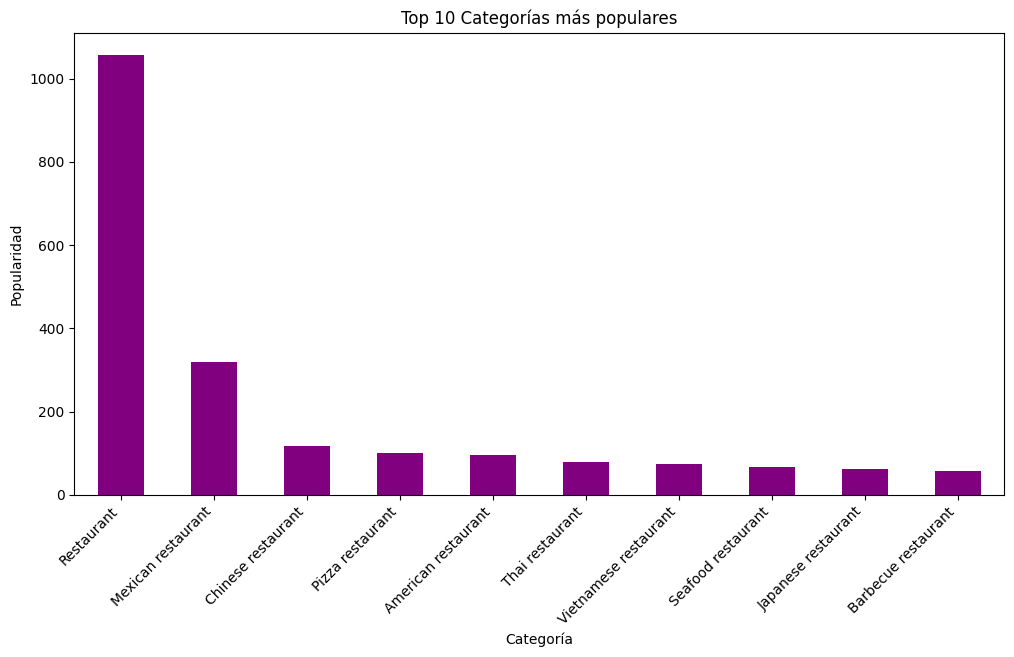

In [67]:
popular_categories = df_restaurants.groupby('categories')['popularFor'].count().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
popular_categories.head(10).plot(kind='bar', color='purple')
plt.title("Top 10 Categorías más populares")
plt.xlabel("Categoría")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Popularidad")
plt.show()

### Relación entre número de reseñas y calificación promedio

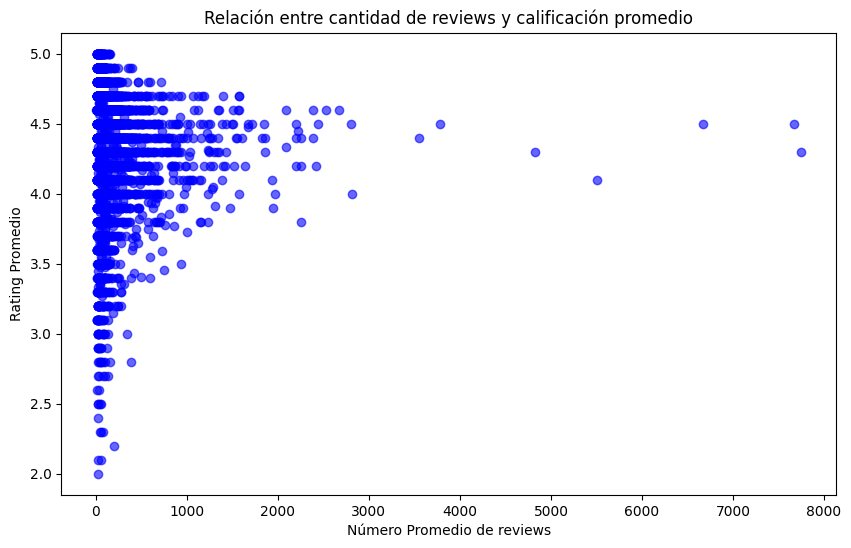

In [69]:
plt.figure(figsize=(10, 6))
plt.scatter(df_restaurants['avgNumReviews'], df_restaurants['avgRating'], alpha=0.6, color='blue')
plt.title("Relación entre cantidad de reviews y calificación promedio")
plt.xlabel("Número Promedio de reviews")
plt.ylabel("Rating Promedio")
plt.show()

Mientras más reviews tenga un restaurante, su calificación promedio se va "estabilizando" generalmente en números más altos.